Link to get dataset:

https://www.kaggle.com/datasets/ytgangster/online-sales-in-usa

In [ ]:
# Colab connect drive
from google.colab import drive
drive.mount('/content/Dataset')

Mounted at /content/Dataset


In [ ]:
#import thư viện
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
## Read data (đọc dữ liệu)
Rtl_data = pd.read_csv('/content/Dataset/Shareddrives/NGHIÊN CỨU KHOA HỌC - DATA /RFM MỞ RỘNG/Dataset/Training dataset.csv')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
Rtl_data.nunique()

order_id            201716
order_date             365
status                  13
item_id             286392
sku                  47932
qty_ordered             72
price                 7561
value                10607
discount_amount      13732
total                23755
category                15
payment_method          13
bi_st                    3
cust_id              64248
year                     2
month                   12
ref_num              62065
Name Prefix              7
First Name            5161
Middle Initial          26
Last Name            18208
Gender                   2
age                     58
full_name            64212
E Mail               64246
Customer Since       11647
SSN                  64146
Place Name           15892
County                2551
City                 15892
State                   51
Zip                  33773
Region                   4
User Name            64006
Discount_Percent     17009
dtype: int64

In [ ]:
Rtl_data.min()

<ipython-input-5-d4f2ba374755>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Rtl_data.min()


order_date                              1/1/2021
status                                  canceled
item_id                                   574769
sku                         jjp_15000006-100-NIL
qty_ordered                                    1
price                                        0.0
value                                        0.0
discount_amount                              0.0
total                                        0.0
category                              Appliances
payment_method                           Easypay
bi_st                                      Gross
cust_id                                        4
year                                        2020
month                                     Apr-21
ref_num                                   111127
Name Prefix                                  Dr.
First Name                                 Aaron
Middle Initial                                 A
Last Name                                  Aaron
Gender              

In [ ]:
Rtl_data.max()

<ipython-input-7-a0558d08d8de>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Rtl_data.max()


order_date                          9/9/2021
status                                refund
item_id                               905208
sku                              ziqi_Zn-808
qty_ordered                              501
price                              101262.59
value                              101262.59
discount_amount                     30213.15
total                              101262.59
category                     Women's Fashion
payment_method                       mcblite
bi_st                                  Valid
cust_id                               115326
year                                    2021
month                                 Sep-21
ref_num                               999981
Name Prefix                            Prof.
First Name                             Zulma
Middle Initial                             Z
Last Name                            Zylstra
Gender                                     M
age                                       75
full_name 

In [ ]:
Rtl_data.shape

(286392, 35)

In [ ]:
Rtl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  int64  
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  int64  
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  int64  
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [ ]:
#xem 10 dòng đầu của data
#Xem chi tiết cả 35 cột
pd.set_option('max_columns', 36)
Rtl_data.head(5)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,10/1/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,10/1/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,10/1/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,10/1/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,11/13/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124,2020,Nov-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [ ]:
#xem 10 dòng cuối của data
Rtl_data.tail(10)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
286382,100562352,9/30/2021,paid,905161,BAGKEM5A703890E559C,2,57.2,57.2,0.0,57.2,Beauty & Grooming,bankalfalah,Valid,23611,2021,Sep-21,501027,Ms.,Danille,O,Van,F,68,"Van, Danille",danille.van@exxonmobil.com,9/20/2012,079-02-3985,Acworth,Sullivan,Acworth,NH,3601,Northeast,dovan,0.0
286383,100562355,9/30/2021,canceled,905165,QAD5B33702879C59,2,99.9,99.9,0.0,99.9,Superstore,bankalfalah,Gross,7828,2021,Sep-21,517420,Mrs.,Shauna,G,Mazzeo,F,61,"Mazzeo, Shauna",shauna.mazzeo@gmail.com,8/31/2013,770-02-7961,Louisville,Jefferson,Louisville,KY,40293,South,sgmazzeo,0.0
286384,100562362,9/30/2021,canceled,905174,MATSAM5B6D7208C6D30,2,12999.9,12999.9,0.0,12999.9,Mobiles & Tablets,bankalfalah,Gross,115321,2021,Sep-21,670487,Mrs.,Dreama,P,Well,F,45,"Well, Dreama",dreama.well@gmail.com,12/16/2003,258-99-6039,Bronx,Bronx,Bronx,NY,10465,Northeast,dpwell,0.0
286385,100562363,9/30/2021,canceled,905175,MEFMOV5AD9155B0C0DC-M,2,104.8,104.8,0.0,104.8,Men's Fashion,bankalfalah,Gross,115322,2021,Sep-21,639345,Ms.,Shaina,K,Nowak,F,56,"Nowak, Shaina",shaina.nowak@gmail.com,11/29/2009,320-11-4545,Chambersburg,Chambersburg,Chambersburg,PA,17202,Northeast,sknowak,0.0
286386,100562364,9/30/2021,processing,905177,MEFMOV5AD9155B0C0DC-M,2,104.8,104.8,0.0,104.8,Men's Fashion,cod,Gross,115322,2021,Sep-21,639345,Ms.,Shaina,K,Nowak,F,56,"Nowak, Shaina",shaina.nowak@gmail.com,11/29/2009,320-11-4545,Chambersburg,Chambersburg,Chambersburg,PA,17202,Northeast,sknowak,0.0
286387,100562365,9/30/2021,paid,905179,APPCHA5AF14939B8F8A,2,4419.9,4419.9,0.0,4419.9,Appliances,Easypay,Valid,115323,2021,Sep-21,967309,Prof.,Brady,K,Latham,M,51,"Latham, Brady",brady.latham@gmail.com,3/21/2007,613-87-0361,Rushville,Yates,Rushville,NY,14544,Northeast,bklatham,0.0
286388,100562376,9/30/2021,cod,905191,MEFCOT5A8D1E973B886,2,39.9,39.9,0.0,39.9,Men's Fashion,cod,Valid,115324,2021,Sep-21,335358,Prof.,Bennie,M,Brunetti,M,52,"Brunetti, Bennie",bennie.brunetti@gmail.com,10/24/2011,101-02-1040,Lawrenceville,Gwinnett,Lawrenceville,GA,30044,South,bmbrunetti,0.0
286389,100562383,9/30/2021,cod,905200,WOFVAL59D5EA84167F9-M,2,40.0,40.0,0.0,40.0,Women's Fashion,cod,Valid,115325,2021,Sep-21,675384,Mrs.,Francesca,N,Giusti,F,38,"Giusti, Francesca",francesca.giusti@btinternet.com,7/25/1987,399-31-7238,Durham,Durham,Durham,NC,27701,South,fngiusti,0.0
286390,100562384,9/30/2021,cod,905202,WOFNIG5B4D7EB0E9FDD-L,2,49.9,49.9,0.0,49.9,Women's Fashion,cod,Valid,115325,2021,Sep-21,675384,Mrs.,Francesca,N,Giusti,F,38,"Giusti, Francesca",francesca.giusti@btinternet.com,7/25/1987,399-31-7238,Durham,Durham,Durham,NC,27701,South,fngiusti,0.0
286391,100562386,9/30/2021,processing,905205,MATHUA5AF70A7D1E50A,2,3559.9,3559.9,0.0,3559.9,Mobiles & Tablets,bankalfalah,Gross,115326,2021,Sep-21,489455,Mr.,Rolf,E,Schlosser,M,28,"Schlosser, Rolf",rolf.schlosser@comcast.net,1/28/2015,320-11-8748,Knoxville,Knox,Knoxville,TN,37920,South,reschlosser,0.0


In [ ]:
Rtl_data[Rtl_data['cust_id']==85775]

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
176044,100447002,2/24/2021,complete,733466,HASQAR5A618CCE63D2D,2,13.3,13.3,0.0,13.3,Health & Sports,cod,Net,85775,2021,Feb-21,647006,Mr.,Joel,U,Gonzalez,M,50,"Gonzalez, Joel",joel.gonzalez@yahoo.com,11/30/2005,668-48-2887,Dekalb,DeKalb,Dekalb,IL,60115,Midwest,jugonzalez,0.0
176045,100447002,2/24/2021,complete,733467,HASQAR5A53698E5B971,2,13.3,13.3,0.0,13.3,Health & Sports,cod,Net,85775,2021,Feb-21,647006,Mr.,Joel,U,Gonzalez,M,50,"Gonzalez, Joel",joel.gonzalez@yahoo.com,11/30/2005,668-48-2887,Dekalb,DeKalb,Dekalb,IL,60115,Midwest,jugonzalez,0.0
176046,100447006,2/24/2021,order_refunded,733473,HASQAR5A53691D10455,3,23.9,47.8,0.0,47.8,Health & Sports,cod,Valid,85775,2021,Feb-21,647006,Mr.,Joel,U,Gonzalez,M,50,"Gonzalez, Joel",joel.gonzalez@yahoo.com,11/30/2005,668-48-2887,Dekalb,DeKalb,Dekalb,IL,60115,Midwest,jugonzalez,0.0
176047,100447173,2/25/2021,complete,733750,HASQAR5A53696A68DF3,2,24.4,24.4,0.0,24.4,Health & Sports,cod,Net,85775,2021,Feb-21,647006,Mr.,Joel,U,Gonzalez,M,50,"Gonzalez, Joel",joel.gonzalez@yahoo.com,11/30/2005,668-48-2887,Dekalb,DeKalb,Dekalb,IL,60115,Midwest,jugonzalez,0.0
176048,100447173,2/25/2021,complete,733751,HASQAR5A5369922FF49,3,16.0,32.0,0.0,32.0,Health & Sports,cod,Net,85775,2021,Feb-21,647006,Mr.,Joel,U,Gonzalez,M,50,"Gonzalez, Joel",joel.gonzalez@yahoo.com,11/30/2005,668-48-2887,Dekalb,DeKalb,Dekalb,IL,60115,Midwest,jugonzalez,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178563,100562253,9/29/2021,cod,904965,HASQAR5A7449994BBA7,2,18.6,18.6,0.0,18.6,Health & Sports,cod,Valid,85775,2021,Sep-21,647006,Mr.,Joel,U,Gonzalez,M,50,"Gonzalez, Joel",joel.gonzalez@yahoo.com,11/30/2005,668-48-2887,Dekalb,DeKalb,Dekalb,IL,60115,Midwest,jugonzalez,0.0
178564,100562253,9/29/2021,cod,904966,HASQAR5A744999A7B52,3,13.3,26.6,0.0,26.6,Health & Sports,cod,Valid,85775,2021,Sep-21,647006,Mr.,Joel,U,Gonzalez,M,50,"Gonzalez, Joel",joel.gonzalez@yahoo.com,11/30/2005,668-48-2887,Dekalb,DeKalb,Dekalb,IL,60115,Midwest,jugonzalez,0.0
178565,100562255,9/29/2021,cod,904968,HASQAR5A53696A68DF3,6,24.4,122.0,0.0,122.0,Health & Sports,cod,Valid,85775,2021,Sep-21,647006,Mr.,Joel,U,Gonzalez,M,50,"Gonzalez, Joel",joel.gonzalez@yahoo.com,11/30/2005,668-48-2887,Dekalb,DeKalb,Dekalb,IL,60115,Midwest,jugonzalez,0.0
178566,100562255,9/29/2021,cod,904969,HASQAR5A687F255CCE7,6,21.3,106.5,0.0,106.5,Health & Sports,cod,Valid,85775,2021,Sep-21,647006,Mr.,Joel,U,Gonzalez,M,50,"Gonzalez, Joel",joel.gonzalez@yahoo.com,11/30/2005,668-48-2887,Dekalb,DeKalb,Dekalb,IL,60115,Midwest,jugonzalez,0.0


In [ ]:
#Kiểm tra xem có bao nhiêu khách hàng
Rtl_data.cust_id.nunique()

64248

In [ ]:
#Check number of null data (check giá trị null)
Rtl_data.isnull().sum(axis=0)

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Customer Since      0
SSN                 0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64

In [ ]:
Rtl_data.duplicated().sum()

0

In [ ]:
#check duplicate data (check dữ liệu trùng lắp)
import ipywidgets
from ipywidgets import interact
def duplicate_values(df):
    print("Duplicate check...", sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, " Duplicates were dropped!",'\n',
             '*'*100, 'red', sep='')
    else:
        print("There are no duplicates",'\n',
              '*'*100, 'red', sep='')    
duplicate_values(Rtl_data)

Duplicate check...
There are no duplicates
****************************************************************************************************red


In [ ]:
#Bỏ đi những cột không cần thiết
dataset = Rtl_data.drop(['item_id', 'sku','payment_method', 'bi_st', 'ref_num', 'Name Prefix', 
                         'First Name', 'Middle Initial', 'Last Name', 'full_name','E Mail','SSN', 'Place Name','County', 'Zip','State',
                         'User Name', 'year', 'value', 'discount_amount', 'total', 'category', 'Customer Since','City', 'Discount_Percent','month'], axis=1)

In [ ]:
dataset.shape

(286392, 9)

In [ ]:
#Xem 5 dòng đầu
dataset.head(5)

,order_id,order_date,status,qty_ordered,price,cust_id,Gender,age,Region
0,100354678,10/1/2020,received,21,89.9,60124,F,43,South
1,100354678,10/1/2020,received,11,19.0,60124,F,43,South
2,100354680,10/1/2020,complete,9,149.9,60124,F,43,South
3,100354680,10/1/2020,complete,9,79.9,60124,F,43,South
4,100367357,11/13/2020,received,2,99.9,60124,F,43,South


In [ ]:
#Xem các giá trị của cột trạng thái
dataset['status'].value_counts()

canceled          112166
complete           88968
received           51775
order_refunded     25713
refund              3820
cod                 2851
paid                 756
closed               176
payment_review        57
pending               48
processing            33
holded                25
pending_paypal         4
Name: status, dtype: int64

In [ ]:
#Loại bỏ các giao dịch bị hủy, hoàn tiền
dataset= dataset.loc[(dataset['status'] != 'canceled') & (dataset['status'] != 'order_refunded') & (dataset['status'] != 'refund') ]
dataset['status'].value_counts()

complete          88968
received          51775
cod                2851
paid                756
closed              176
payment_review       57
pending              48
processing           33
holded               25
pending_paypal        4
Name: status, dtype: int64

In [ ]:
dataset.shape

(144693, 9)

In [ ]:
#Kiểm tra xem có bao nhiêu khách hàng còn lại sau khi lọc đơn bị hủy, hoàn tiền
dataset.cust_id.nunique()

42589

In [ ]:
#Sau khi chỉ còn lại đơn hợp lệ thì mình bỏ đi cột Status
dataset = dataset.drop(['status'], axis=1)
print(dataset.head())
print(dataset.shape)

    order_id  order_date  qty_ordered  price  cust_id Gender  age Region
0  100354678   10/1/2020           21   89.9    60124      F   43  South
1  100354678   10/1/2020           11   19.0    60124      F   43  South
2  100354680   10/1/2020            9  149.9    60124      F   43  South
3  100354680   10/1/2020            9   79.9    60124      F   43  South
4  100367357  11/13/2020            2   99.9    60124      F   43  South
(144693, 8)


In [ ]:
#Convert the string date field to datetime (chuyển kiểu dữ liệu của order_date thành datetime)
dataset['order_date'] = pd.to_datetime(dataset['order_date'])

In [ ]:
#Add new column depicting total amount (thêm cột tính Total Amount vào)
dataset['TotalAmount'] = dataset['qty_ordered'] * dataset['price']

In [ ]:
#Xem thông tin bộ dữ liệu sau khi thêm cột Total Amount vào
dataset.head()

,order_id,order_date,qty_ordered,price,cust_id,Gender,age,Region,TotalAmount
0,100354678,2020-10-01,21,89.9,60124,F,43,South,1887.9
1,100354678,2020-10-01,11,19.0,60124,F,43,South,209.0
2,100354680,2020-10-01,9,149.9,60124,F,43,South,1349.1
3,100354680,2020-10-01,9,79.9,60124,F,43,South,719.1
4,100367357,2020-11-13,2,99.9,60124,F,43,South,199.8


In [ ]:
#Xem số lượng giao dịch đến từ từng vùng
dataset['Region'].value_counts()

South        51926
Midwest      41527
West         25774
Northeast    25466
Name: Region, dtype: int64

In [ ]:
#XÂY DỰNG MÔ HÌNH RFM CHO DATASET
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt
dataset['order_date'] = pd.to_datetime(dataset['order_date'])

In [ ]:
#dataset.to_csv('cleanOriginDataset.csv')

In [ ]:
# lấy ngày gần đây nhất + 1 ( để khi lấy ngày hiện tại trừ ra sẽ ko âm), ngày hiện tại sẽ mang giá trị 1, trừ đi những ngày khác sẽ ra giá trị F
Latest_Date = max(dataset['order_date']) + dt.timedelta(days=1)

In [ ]:
#Group Orderline
Orders = dataset.groupby(['order_id','cust_id','order_date','Gender','Region','age']).agg(
    {
     'TotalAmount': 'sum'
    }).reset_index()
Orders

,order_id,cust_id,order_date,Gender,Region,age,TotalAmount
0,100354678,60124,2020-10-01,F,South,43,2096.9
1,100354680,60124,2020-10-01,F,South,43,2068.2
2,100354689,56449,2020-10-01,F,Midwest,71,1053.0
3,100354691,56449,2020-10-01,F,Midwest,71,460.0
4,100354697,31655,2020-10-01,F,West,38,260.4
...,...,...,...,...,...,...,...
93868,100562290,111664,2021-09-29,M,Northeast,74,320.0
93869,100562291,112047,2021-09-29,F,South,45,516.0
93870,100562311,91249,2021-09-30,F,Northeast,27,1136.0
93871,100562358,110259,2021-09-30,F,West,72,119.7


In [ ]:
Orders[Orders['cust_id']==4]

,order_id,cust_id,order_date,Gender,Region,age,TotalAmount
7416,100374843,4,2020-12-06,M,Midwest,33,2739.8
8471,100376930,4,2020-12-13,M,Midwest,33,2800.0
8588,100377141,4,2020-12-13,M,Midwest,33,249.2
8637,100377220,4,2020-12-13,M,Midwest,33,2800.0
8668,100377265,4,2020-12-13,M,Midwest,33,2800.0
10039,100380212,4,2020-12-17,M,Midwest,33,404.8
13051,100386045,4,2020-12-20,M,Midwest,33,2216.4
20667,100399757,4,2020-12-23,M,Midwest,33,14062.6
20675,100399773,4,2020-12-23,M,Midwest,33,16458.4
20678,100399779,4,2020-12-23,M,Midwest,33,9479.2


In [ ]:
Orders[Orders['TotalAmount']==0]

,order_id,cust_id,order_date,Gender,Region,age,TotalAmount
1914,100359096,61323,2020-10-23,F,South,59,0.0
1947,100359185,61341,2020-10-24,M,South,31,0.0
1959,100359205,58295,2020-10-24,F,South,61,0.0
2052,100359405,61403,2020-10-24,M,Midwest,70,0.0
2071,100359456,61413,2020-10-24,F,South,26,0.0
...,...,...,...,...,...,...,...
84321,100465250,54584,2021-03-31,M,South,42,0.0
86516,100471148,92748,2021-04-05,F,Northeast,31,0.0
90032,100534107,109203,2021-06-26,M,South,36,0.0
90208,100535075,109626,2021-06-28,M,Midwest,37,0.0


In [ ]:
#Create RFM Modelling scores for each customer (Tạo các biến R, F, M cho từng khách hàng)
RFMScores = Orders.groupby(['cust_id','Gender','Region','age']).agg(
    {'order_date': lambda x: (Latest_Date - x.max()).days, 
     'order_id': 'count', 
     'TotalAmount': 'sum'
    }).reset_index()
RFMScores

,cust_id,Gender,Region,age,order_date,order_id,TotalAmount
0,4,M,Midwest,33,2,18,58339.20
1,15,F,Midwest,69,232,3,415.10
2,20,M,South,27,2,7,52330.80
3,21,M,South,34,240,1,126.00
4,23,M,Northeast,66,55,2,786.48
...,...,...,...,...,...,...,...
42584,115322,F,Northeast,56,1,1,209.60
42585,115323,M,Northeast,51,1,1,8839.80
42586,115324,M,South,52,1,1,79.80
42587,115325,F,South,38,1,2,179.80


In [ ]:
#Convert order_date into type int (Chuyển order_date thành kiểu int)
RFMScores['order_date'] = RFMScores['order_date'].astype(int)

In [ ]:
#Rename column names to Recency, Frequency and Monetary (đổi tên các cột thành Recency, Frequency, Monetary)
RFMScores.rename(columns={'order_date': 'Recency', 
                         'order_id': 'Frequency', 
                         'TotalAmount': 'Monetary',
                          'age': 'Age'}, inplace=True)
RFMScores

,cust_id,Gender,Region,Age,Recency,Frequency,Monetary
0,4,M,Midwest,33,2,18,58339.20
1,15,F,Midwest,69,232,3,415.10
2,20,M,South,27,2,7,52330.80
3,21,M,South,34,240,1,126.00
4,23,M,Northeast,66,55,2,786.48
...,...,...,...,...,...,...,...
42584,115322,F,Northeast,56,1,1,209.60
42585,115323,M,Northeast,51,1,1,8839.80
42586,115324,M,South,52,1,1,79.80
42587,115325,F,South,38,1,2,179.80


In [ ]:
RFMScores[RFMScores['Frequency']==770]

,cust_id,Gender,Region,Age,Recency,Frequency,Monetary
24421,85775,M,Midwest,50,2,770,133343.2


In [ ]:
#Descriptive Statistics
# RFMScores['Recency','Frequency','Monetary'].describe(include='all')
RFMScores[['Recency','Frequency','Monetary']].describe()
#Tứ phân vị RFM
# Chưa loại bỏ các khách hàng có monetary = 0

,Recency,Frequency,Monetary
count,42589.000000,42589.000000,42589.000000
mean,197.048393,2.204161,4322.311665
std,89.375423,5.287685,12730.934128
min,1.000000,1.000000,0.000000
25%,136.000000,1.000000,239.400000
50%,192.000000,1.000000,639.400000
75%,279.000000,2.000000,3200.000000
max,365.000000,770.000000,582665.400000


In [ ]:
RFMScores[RFMScores['Monetary']==0]

,cust_id,Gender,Region,Age,Recency,Frequency,Monetary
439,3537,M,South,67,285,1,0.0
472,3872,F,South,67,338,1,0.0
1741,14368,F,Midwest,35,324,2,0.0
2073,16921,F,South,51,321,1,0.0
2370,19595,F,South,39,315,1,0.0
...,...,...,...,...,...,...,...
42545,115277,M,Northeast,43,2,1,0.0
42546,115278,F,Northeast,45,2,1,0.0
42547,115279,F,Midwest,34,2,1,0.0
42549,115281,F,West,62,2,1,0.0


In [ ]:
RFMScores[RFMScores['Monetary']==0][['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,97.000000,97.000000,97.0
mean,260.865979,1.092784,0.0
std,87.946199,0.384124,0.0
min,2.000000,1.000000,0.0
25%,215.000000,1.000000,0.0
50%,297.000000,1.000000,0.0
75%,324.000000,1.000000,0.0
max,343.000000,4.000000,0.0


In [ ]:
print("Tổng giao số lượng giao dịch của khách hàng:",93873 - RFMScores[RFMScores['Monetary']==0]['Frequency'].sum())

Tổng giao số lượng giao dịch của khách hàng: 93767


In [ ]:
#Lọc ra những giá trị Monetary = 0
RFMScores= RFMScores.loc[(RFMScores['Monetary'] != 0)]

In [ ]:
RFMScores.shape

(42492, 7)

In [ ]:
#Descriptive Statistics
RFMScores[['Recency','Frequency','Monetary']].describe()
#Tứ phân vị RFM sau khi bỏ Monetary = 0

,Recency,Frequency,Monetary
count,42492.000000,42492.000000,42492.000000
mean,196.902711,2.206698,4332.178563
std,89.327534,5.293418,12743.780135
min,1.000000,1.000000,0.200000
25%,136.000000,1.000000,239.600000
50%,192.000000,1.000000,643.950000
75%,279.000000,2.000000,3200.000000
max,365.000000,770.000000,582665.400000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


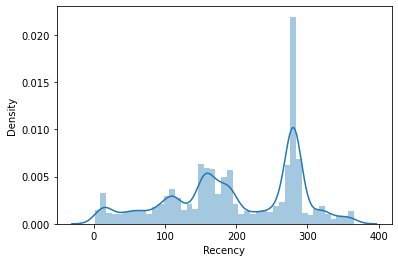

In [ ]:
#Xem phân bổ dữ liệu của Recency
x = RFMScores['Recency']
ax = sns.distplot(x)

TypeError: ignored

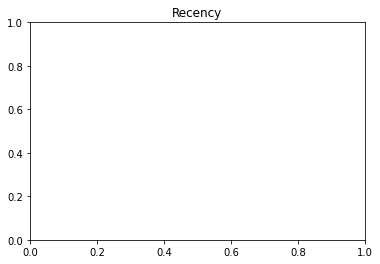

In [ ]:
#Check oulier cho Recency
red_square = dict(markerfacecolor='r', marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title('Recency')
ax5.boxplot(data = RFMScores, x = 'Recency', y = 'Gender',  flierprops=red_square)
#Recency không có outlier

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


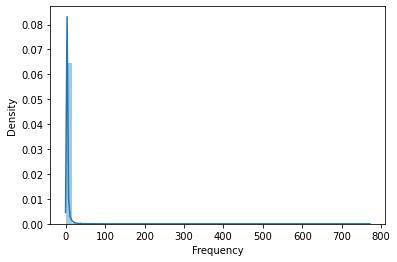

In [ ]:
#Xem phân phối của Frequency
x = RFMScores['Frequency']
ax = sns.distplot(x)
#Bị lệch phải khá nhiều

In [ ]:
RFMScores['Frequency'].max()

770

{'whiskers': [<matplotlib.lines.Line2D at 0x7faf9c5f8760>,
 'caps': [<matplotlib.lines.Line2D at 0x7faf9c5f8d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faf9c5f8490>],
 'medians': [<matplotlib.lines.Line2D at 0x7faf9c6042e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faf9c6045b0>],
 'means': []}

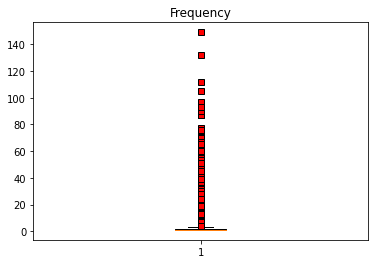

In [ ]:
#Check outlier cho Frequency
red_square = dict(markerfacecolor='r', marker='s')
fig6, ax6 = plt.subplots()
ax6.set_title('Frequency')
ax6.boxplot(RFMScores['Frequency'][RFMScores['Frequency']!=770],  flierprops=red_square)
#Frequency có outlier

In [ ]:
#xử lí outlier cho Frequency
#Q1 = RFMScores.Frequency.quantile(0.25)
#Q3 = RFMScores.Frequency.quantile(0.75)
#IQR = Q3 - Q1
#RFMScores = RFMScores[(RFMScores.Frequency >= (Q1 - 1.5*IQR)) & (RFMScores.Frequency <= (Q3 + 1.5*IQR))]
#RFMScores.describe()
#cái này là sao ?

In [ ]:
#Check lại sau khi xử lý outlier cho Frequency
# red_square = dict(markerfacecolor='r', marker='s')
# fig6, ax6 = plt.subplots()
# ax6.set_title('Horizontal Boxes')
# ax6.boxplot(RFMScores['Frequency'], vert=False, flierprops=red_square)
#Okie đã hết outlier

In [ ]:
#Xem hình dáng dữ liệu Frequency sau  khi lọc outlier
# x = RFMScores['Frequency']
# ax = sns.distplot(x)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


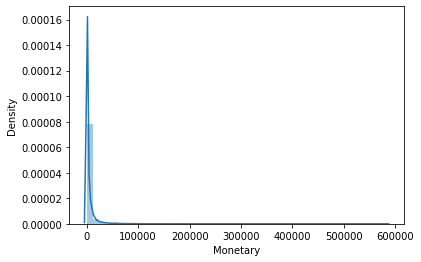

In [ ]:
#Xem phân bổ dữ liệu của Monetary
x = RFMScores['Monetary']
ax = sns.distplot(x)
#Monetary bị lệch phải

{'whiskers': [<matplotlib.lines.Line2D at 0x7fafa4266850>,
 'caps': [<matplotlib.lines.Line2D at 0x7fafa4266df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fafa4266580>],
 'medians': [<matplotlib.lines.Line2D at 0x7fafa41f73d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fafa41f76a0>],
 'means': []}

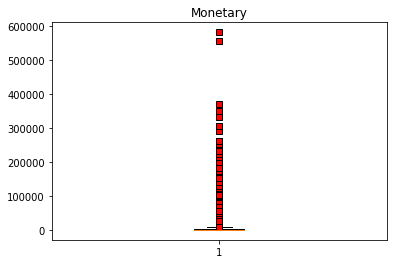

In [ ]:
#Check outlier cho Monetary
red_square = dict(markerfacecolor='r', marker='s')
fig7, ax7 = plt.subplots()
ax7.set_title('Monetary')
ax7.boxplot(RFMScores['Monetary'],  flierprops=red_square)
#Khá là nhìu outlier

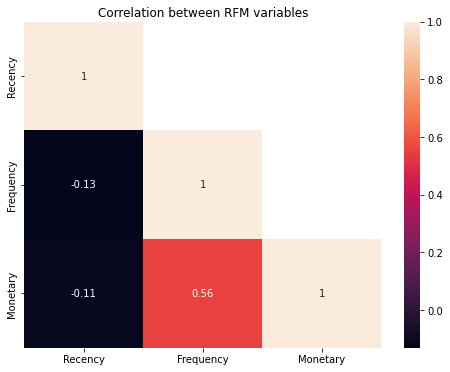

In [ ]:
heat = RFMScores[['Recency','Frequency','Monetary']].corr()
matrix = np.triu(heat)
np.fill_diagonal(matrix, False) 
plt.figure(figsize=[8,6])
plt.title("Correlation between RFM variables", size=12, pad=5)
sns.heatmap(heat, annot=True,mask=matrix)
plt.show()

In [ ]:
#xử lí outlier cho Monetary
#Q1 = RFMScores.Monetary.quantile(0.25)
#Q3 = RFMScores.Monetary.quantile(0.75)
#IQR = Q3 - Q1
#RFMScores = RFMScores[(RFMScores.Monetary >= (Q1 - 1.5*IQR)) & (RFMScores.Monetary<= (Q3 + 1.5*IQR))]

In [ ]:
# x = RFMScores['Monetary']
# ax = sns.distplot(x)

In [ ]:
# red_square = dict(markerfacecolor='r', marker='s')
# fig8, ax8 = plt.subplots()
# ax8.set_title('Horizontal Boxes')
# ax8.boxplot(RFMScores['Monetary'], vert=False, flierprops=red_square)

In [ ]:
#Bộ dữ liệu chỉ có các biến RFM, tách riêng 3 biến R, F,M để đi boxcox và scale
RFM = RFMScores
RFM = RFM.drop(['Age','Gender', 'Region'], axis=1)
RFM.tail(5)

,cust_id,Recency,Frequency,Monetary
42584,115322,1,1,209.6
42585,115323,1,1,8839.8
42586,115324,1,1,79.8
42587,115325,1,2,179.8
42588,115326,1,1,7119.8


In [ ]:
#Bộ dữ liệu chỉ có các biến Demo, sau này sẽ thêm các biến R,F,M sau khi scale vào để ra bộ cuối cùng
RFMD= RFMScores
RFMD = RFMD.drop(['Recency', 'Frequency', 'Monetary'], axis=1)
RFMD.head(5)


,cust_id,Gender,Region,Age
0,4,M,Midwest,33
1,15,F,Midwest,69
2,20,M,South,27
3,21,M,South,34
4,23,M,Northeast,66


In [ ]:
RFMScores.head(5)

,cust_id,Gender,Region,Age,Recency,Frequency,Monetary
0,4,M,Midwest,33,2,18,58339.20
1,15,F,Midwest,69,232,3,415.10
2,20,M,South,27,2,7,52330.80
3,21,M,South,34,240,1,126.00
4,23,M,Northeast,66,55,2,786.48


In [ ]:
RFMScores.to_csv('RFMScores.csv')

In [ ]:
#Viết hàm phân tích thử nên dùng log, căn bậc 2 hay boxcox
from scipy import stats
def analyze_skewness(x):
   fig, ax = plt.subplots(2,2, figsize=(5,5))
   sns.distplot(RFM[x], ax=ax[0,0])
   sns.distplot(np.log(RFM[x]), ax=ax[0,1])
   sns.distplot(np.sqrt(RFM[x]), ax=ax[1,0])
   sns.distplot(stats.boxcox(RFM[x])[0], ax=ax[1,1])
   plt.tight_layout()
   plt.show()

   print(RFM[x].skew().round(2))
   print(np.log(RFM[x]).skew().round(2))
   print(np.sqrt(RFM[x]).skew().round(2))
   print(pd.Series(stats.boxcox(RFM[x])[0]).skew().round(2))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

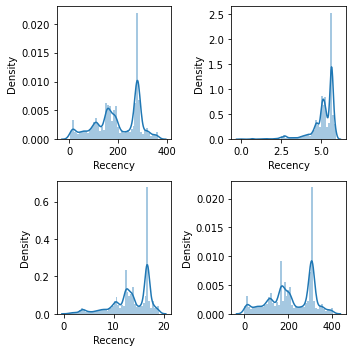

-0.35
-2.37
-1.01
-0.33


In [ ]:
analyze_skewness('Recency')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

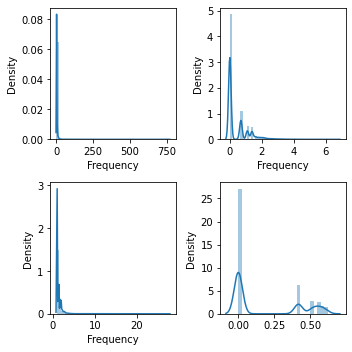

76.1
1.76
5.28
0.71


In [ ]:
analyze_skewness('Frequency')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

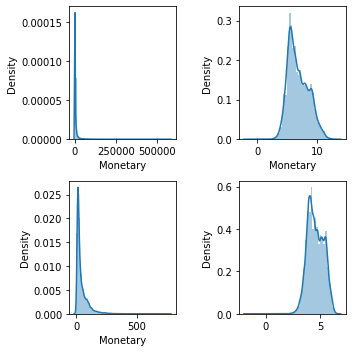

11.9
0.46
2.92
0.04


In [ ]:
analyze_skewness('Monetary')

In [ ]:
#Boxcox transformation
from scipy import stats
RFM['Recency'] = stats.boxcox(RFM['Recency'])[0]
RFM['Frequency'] = stats.boxcox(RFM['Frequency'])[0]
RFM['Monetary'] = stats.boxcox(RFM['Monetary'])[0]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

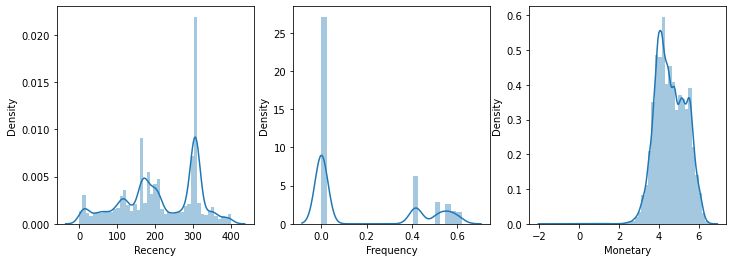

In [ ]:
#Hình dáng dữ liệu sau khi dùng boxcox
fig, ax = plt.subplots(1, 3,figsize= (12,4))
sns.distplot(RFM['Recency'], ax = ax[0])
sns.distplot(RFM['Frequency'], ax = ax[1])
sns.distplot(RFM['Monetary'], ax = ax[2])
plt.show()

In [ ]:
# Tiến hành Scale dữ liệu => dạng array
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_Data = scaler.fit_transform(RFM) 
Scaled_Data
#Chuyển scaled data thành Dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFM.index, columns = RFM.columns)
Scaled_Data

,cust_id,Recency,Frequency,Monetary
0,-2.977195,-2.155221,1.807196,2.066071
1,-2.976774,0.389741,1.397289,-0.391672
2,-2.976583,-2.155221,1.720813,2.026171
3,-2.976545,0.479979,-0.728658,-1.234476
4,-2.976468,-1.584381,0.995817,0.013101
...,...,...,...,...
42584,1.432438,-2.165418,-0.728658,-0.860013
42585,1.432476,-2.165418,-0.728658,1.294221
42586,1.432514,-2.165418,-0.728658,-1.590469
42587,1.432552,-2.165418,0.995817,-0.970470


In [ ]:
#Thêm cột R, F, M vào cái RFMD
extracted_col = Scaled_Data["Recency"]
RFMD = RFMD.join(extracted_col)
extracted_col = Scaled_Data["Frequency"]
RFMD = RFMD.join(extracted_col)
extracted_col = Scaled_Data["Monetary"]
RFMD = RFMD.join(extracted_col)
RFMD.tail()
#Bây giờ RFMD là mô hình dữ liệu cuối

,cust_id,Gender,Region,Age,Recency,Frequency,Monetary
42584,115322,F,Northeast,56,-2.165418,-0.728658,-0.860013
42585,115323,M,Northeast,51,-2.165418,-0.728658,1.294221
42586,115324,M,South,52,-2.165418,-0.728658,-1.590469
42587,115325,F,South,38,-2.165418,0.995817,-0.970470
42588,115326,M,South,28,-2.165418,-0.728658,1.194093


In [ ]:
RFMD.shape

(42492, 7)

In [ ]:
#RFMD.to_csv('RFMD_afterScaled.csv')
#RFMScores.to_csv('RFMD_beforeScaled.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()

In [ ]:
gender_encoder.fit(RFMD['Gender'])

LabelEncoder()

In [ ]:
gender_values = gender_encoder.transform(RFMD['Gender'])

In [ ]:
RFMD['Gender Label'] = gender_values

In [ ]:
RFMD

,cust_id,Gender,Region,Age,Recency,Frequency,Monetary,Gender Label
0,4,M,Midwest,33,-2.155221,1.807196,2.066071,1
1,15,F,Midwest,69,0.389741,1.397289,-0.391672,0
2,20,M,South,27,-2.155221,1.720813,2.026171,1
3,21,M,South,34,0.479979,-0.728658,-1.234476,1
4,23,M,Northeast,66,-1.584381,0.995817,0.013101,1
...,...,...,...,...,...,...,...,...
42584,115322,F,Northeast,56,-2.165418,-0.728658,-0.860013,0
42585,115323,M,Northeast,51,-2.165418,-0.728658,1.294221,1
42586,115324,M,South,52,-2.165418,-0.728658,-1.590469,1
42587,115325,F,South,38,-2.165418,0.995817,-0.970470,0


In [ ]:
pd.get_dummies(RFMD['Gender Label']).head()

,0,1
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [ ]:
RFMD = pd.get_dummies(RFMD, columns=['Gender Label'])
RFMD.tail()

,cust_id,Gender,Region,Age,Recency,Frequency,Monetary,Gender Label_0,Gender Label_1
42584,115322,F,Northeast,56,-2.165418,-0.728658,-0.860013,1,0
42585,115323,M,Northeast,51,-2.165418,-0.728658,1.294221,0,1
42586,115324,M,South,52,-2.165418,-0.728658,-1.590469,0,1
42587,115325,F,South,38,-2.165418,0.995817,-0.970470,1,0
42588,115326,M,South,28,-2.165418,-0.728658,1.194093,0,1


In [ ]:
RFMD.Age.describe()

count    42492.000000
mean        46.402123
std         16.727267
min         18.000000
25%         32.000000
50%         46.000000
75%         61.000000
max         75.000000
Name: Age, dtype: float64

In [ ]:
bins = [18,24,64,75]
labels=['Age 18-24','Age 25-64','Age 65+']
RFMD['Age Range'] = pd.cut(RFMD['Age'], bins=bins, labels=labels, include_lowest=True)
RFMD

,cust_id,Gender,Region,Age,Recency,Frequency,Monetary,Gender Label_0,Gender Label_1,Age Range
0,4,M,Midwest,33,-2.155221,1.807196,2.066071,0,1,Age 25-64
1,15,F,Midwest,69,0.389741,1.397289,-0.391672,1,0,Age 65+
2,20,M,South,27,-2.155221,1.720813,2.026171,0,1,Age 25-64
3,21,M,South,34,0.479979,-0.728658,-1.234476,0,1,Age 25-64
4,23,M,Northeast,66,-1.584381,0.995817,0.013101,0,1,Age 65+
...,...,...,...,...,...,...,...,...,...,...
42584,115322,F,Northeast,56,-2.165418,-0.728658,-0.860013,1,0,Age 25-64
42585,115323,M,Northeast,51,-2.165418,-0.728658,1.294221,0,1,Age 25-64
42586,115324,M,South,52,-2.165418,-0.728658,-1.590469,0,1,Age 25-64
42587,115325,F,South,38,-2.165418,0.995817,-0.970470,1,0,Age 25-64


In [ ]:
pd.get_dummies(RFMD['Age Range']).head()

,Age 18-24,Age 25-64,Age 65+
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [ ]:
RFMD = pd.get_dummies(RFMD, columns=['Age Range'])
RFMD.head(10)

,cust_id,Gender,Region,Age,Recency,Frequency,Monetary,Gender Label_0,Gender Label_1,Age Range_Age 18-24,Age Range_Age 25-64,Age Range_Age 65+
0,4,M,Midwest,33,-2.155221,1.807196,2.066071,0,1,0,1,0
1,15,F,Midwest,69,0.389741,1.397289,-0.391672,1,0,0,0,1
2,20,M,South,27,-2.155221,1.720813,2.026171,0,1,0,1,0
3,21,M,South,34,0.479979,-0.728658,-1.234476,0,1,0,1,0
4,23,M,Northeast,66,-1.584381,0.995817,0.013101,0,1,0,0,1
5,28,M,West,71,1.714765,-0.728658,-0.879372,0,1,0,0,1
6,32,M,West,62,-2.039605,1.829619,2.334334,0,1,0,1,0
7,33,F,West,69,-1.671914,1.826438,2.149909,1,0,0,0,1
8,41,M,South,23,1.351335,-0.728658,-0.353779,0,1,1,0,0
9,44,F,South,35,-0.965924,1.397289,1.334322,1,0,0,1,0


In [ ]:
region_encoder = LabelEncoder()

In [ ]:
region_encoder.fit(RFMD['Region'])

LabelEncoder()

In [ ]:
region_values = region_encoder.transform(RFMD['Region'])

In [ ]:
RFMD['Region Label'] = region_values

In [ ]:
RFMD

,cust_id,Gender,Region,Age,Recency,Frequency,Monetary,Gender Label_0,Gender Label_1,Age Range_Age 18-24,Age Range_Age 25-64,Age Range_Age 65+,Region Label
0,4,M,Midwest,33,-2.155221,1.807196,2.066071,0,1,0,1,0,0
1,15,F,Midwest,69,0.389741,1.397289,-0.391672,1,0,0,0,1,0
2,20,M,South,27,-2.155221,1.720813,2.026171,0,1,0,1,0,2
3,21,M,South,34,0.479979,-0.728658,-1.234476,0,1,0,1,0,2
4,23,M,Northeast,66,-1.584381,0.995817,0.013101,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42584,115322,F,Northeast,56,-2.165418,-0.728658,-0.860013,1,0,0,1,0,1
42585,115323,M,Northeast,51,-2.165418,-0.728658,1.294221,0,1,0,1,0,1
42586,115324,M,South,52,-2.165418,-0.728658,-1.590469,0,1,0,1,0,2
42587,115325,F,South,38,-2.165418,0.995817,-0.970470,1,0,0,1,0,2


In [ ]:
pd.get_dummies(RFMD['Region Label']).head()

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [ ]:
RFMD = pd.get_dummies(RFMD, columns=['Region Label'])
RFMD.tail()

,cust_id,Gender,Region,Age,Recency,Frequency,Monetary,Gender Label_0,Gender Label_1,Age Range_Age 18-24,Age Range_Age 25-64,Age Range_Age 65+,Region Label_0,Region Label_1,Region Label_2,Region Label_3
42584,115322,F,Northeast,56,-2.165418,-0.728658,-0.860013,1,0,0,1,0,0,1,0,0
42585,115323,M,Northeast,51,-2.165418,-0.728658,1.294221,0,1,0,1,0,0,1,0,0
42586,115324,M,South,52,-2.165418,-0.728658,-1.590469,0,1,0,1,0,0,0,1,0
42587,115325,F,South,38,-2.165418,0.995817,-0.970470,1,0,0,1,0,0,0,1,0
42588,115326,M,South,28,-2.165418,-0.728658,1.194093,0,1,0,1,0,0,0,1,0


In [ ]:
RFMD = RFMD.drop(['Gender','Region', 'Age','cust_id'], axis = 'columns')

In [ ]:
RFMD.head(5)


,Recency,Frequency,Monetary,Gender Label_0,Gender Label_1,Age Range_Age 18-24,Age Range_Age 25-64,Age Range_Age 65+,Region Label_0,Region Label_1,Region Label_2,Region Label_3
0,-2.155221,1.807196,2.066071,0,1,0,1,0,1,0,0,0
1,0.389741,1.397289,-0.391672,1,0,0,0,1,1,0,0,0
2,-2.155221,1.720813,2.026171,0,1,0,1,0,0,0,1,0
3,0.479979,-0.728658,-1.234476,0,1,0,1,0,0,0,1,0
4,-1.584381,0.995817,0.013101,0,1,0,0,1,0,1,0,0


In [ ]:
RFMD.rename(columns={'Gender Label_0': 'Gender F', 'Gender Label_1': 'Gender M',
                        'Age Range_Age 18-24': 'Age 18-24', 'Age Range_Age 25-64': 'Age 25-64', 'Age Range_Age 65+': 'Age 65+', 'Region Label_0':'Region Midwest', 'Region Label_1':'Region Northeast', 'Region Label_2':'Region South',	'Region Label_3':'Region West'}, inplace=True)
RFMD

,Recency,Frequency,Monetary,Gender F,Gender M,Age 18-24,Age 25-64,Age 65+,Region Midwest,Region Northeast,Region South,Region West
0,-2.155221,1.807196,2.066071,0,1,0,1,0,1,0,0,0
1,0.389741,1.397289,-0.391672,1,0,0,0,1,1,0,0,0
2,-2.155221,1.720813,2.026171,0,1,0,1,0,0,0,1,0
3,0.479979,-0.728658,-1.234476,0,1,0,1,0,0,0,1,0
4,-1.584381,0.995817,0.013101,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
42584,-2.165418,-0.728658,-0.860013,1,0,0,1,0,0,1,0,0
42585,-2.165418,-0.728658,1.294221,0,1,0,1,0,0,1,0,0
42586,-2.165418,-0.728658,-1.590469,0,1,0,1,0,0,0,1,0
42587,-2.165418,0.995817,-0.970470,1,0,0,1,0,0,0,1,0


In [ ]:
RFMD.to_csv('RFMD_encoding_scaled.csv', index = False)

In [ ]:
RFMD_Scores = pd.concat([RFMDScores.drop(['Region','Age','Gender'], axis = 'columns'),RFMD.drop(['Recency','Frequency','Monetary'], axis = 'columns')], axis = 'columns')
RFMD_Scores.head(5)

,cust_id,Recency,Frequency,Monetary,Gender F,Gender M,Age 18-24,Age 25-64,Age 65+,Region Midwest,Region Northeast,Region South,Region West
0,4,2,18,58339.20,0,1,0,1,0,1,0,0,0
1,15,232,3,415.10,1,0,0,0,1,1,0,0,0
2,20,2,7,52330.80,0,1,0,1,0,0,0,1,0
3,21,240,1,126.00,0,1,0,1,0,0,0,1,0
4,23,55,2,786.48,0,1,0,0,1,0,1,0,0


In [ ]:
RFMD_Scores.to_csv('[Final] - RFMD_encoding_noScaled.csv', index = False)

## Tìm k cụm bằng các phương pháp Elbow, SSE,DBI

In [ ]:
RFMD.head(5)

,Recency,Frequency,Monetary,Gender F,Gender M,Age 18-24,Age 25-64,Age 65+,Region Midwest,Region Northeast,Region South,Region West,Cluster
0,-2.155221,1.807196,2.066071,0,1,0,1,0,1,0,0,0,0
1,0.389741,1.397289,-0.391672,1,0,0,0,1,1,0,0,0,4
2,-2.155221,1.720813,2.026171,0,1,0,1,0,0,0,1,0,0
3,0.479979,-0.728658,-1.234476,0,1,0,1,0,0,0,1,0,3
4,-1.584381,0.995817,0.013101,0,1,0,0,1,0,1,0,0,0


In [ ]:
RFMD.shape

(42492, 13)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sum_of_sq_dist = {}
range_n_clusters = range(2,16)

for k in range_n_clusters:
  cust_seg = KMeans(n_clusters = k,init = 'k-means++',max_iter = 1000)
  cust_seg = cust_seg.fit(RFMD)
  sum_of_sq_dist[k] = cust_seg.inertia_


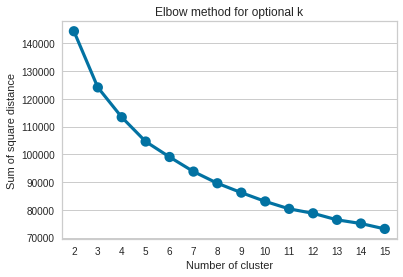

In [ ]:
#plot the graph for the sum of square distance values and Number of cluster
sns.pointplot(x = list(sum_of_sq_dist.keys()),y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of cluster')
plt.ylabel('Sum of square distance')
plt.title('Elbow method for optional k')
plt.show()

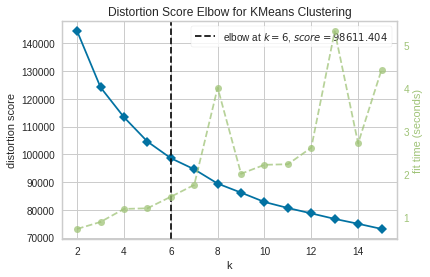

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=15)
Elbow_M.fit(RFMD)
Elbow_M.show()

In [ ]:
# Kiểm định bằng phương pháp Silhouette
# from sklearn.datasets import make_blobs
# from sklearn.metrics import silhouette_samples, silhouette_score

# sil=[]
# range_n_clusters = range(2,16)

# for k in range_n_clusters:
#     cust_seg = KMeans(n_clusters = k,init = 'k-means++',max_iter = 10000)
#     cluster_labels = cust_seg.fit_predict(RFMD)
#     silhouette_avg = silhouette_score(RFMD, cluster_labels)
#     print("For n_clusters =", k,
#           "The average silhouette_score is :", silhouette_avg)
#     sil.append(silhouette_avg)

In [ ]:
# Kiểm định bằng phương pháp Davies-Bouldin
# from sklearn.metrics import davies_bouldin_score

# for k in range_n_clusters:
#     cust_seg = KMeans(n_clusters = k,init = 'k-means++',max_iter = 10000)
#     preds = cust_seg.fit_predict(RFMD)
    
#     score = davies_bouldin_score(RFMD , preds)
#     print ("For n_clusters = {}, the Davies-Bouldin score is {})".format(k, score))

In [ ]:
# from sklearn.cluster import AgglomerativeClustering
# #phân cụm phân tầng

# Kmeans và tứ phân vị từng cụm

In [ ]:
#mấy cái này để mình nhìn full column
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
RFMD.head(5)

NameError: ignored

In [ ]:
# RFMD_Scores_6 = RFMD_Scores_6.drop(['Cluster'], axis = 1)
# RFMD_6 = RFMD_6.drop(['Cluster'], axis = 1)
# RFMD_Scores = RFMD_Scores.drop(['Cluster'], axis = 1)


In [ ]:
# # RFMD_Scores_4 = pd.concat([RFMD_Scores_4,RFMD_4['Cluster']],axis = 'columns')
# RFMD_Scores.head(5)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
RFMD = pd.read_csv('/content/drive/Shareddrives/NGHIÊN CỨU KHOA HỌC - DATA /RFM MỞ RỘNG/1. Final_dataset/[Final] - RFMD_encoding_scaled.csv')
RFMD_Scores = pd.read_csv('/content/drive/Shareddrives/NGHIÊN CỨU KHOA HỌC - DATA /RFM MỞ RỘNG/1. Final_dataset/[Final] - RFMD_encoding_noScaled.csv')

In [ ]:
RFMD.head(5)

,Recency,Frequency,Monetary,Gender F,Gender M,Age 18-24,Age 25-64,Age 65+,Region Midwest,Region Northeast,Region South,Region West
0,-2.155221,1.807196,2.066071,0,1,0,1,0,1,0,0,0
1,0.389741,1.397289,-0.391672,1,0,0,0,1,1,0,0,0
2,-2.155221,1.720813,2.026171,0,1,0,1,0,0,0,1,0
3,0.479979,-0.728658,-1.234476,0,1,0,1,0,0,0,1,0
4,-1.584381,0.995817,0.013101,0,1,0,0,1,0,1,0,0


In [ ]:
RFMD_Scores.head(5)

,cust_id,Recency,Frequency,Monetary,Gender F,Gender M,Age 18-24,Age 25-64,Age 65+,Region Midwest,Region Northeast,Region South,Region West
0,4,2,18,58339.20,0,1,0,1,0,1,0,0,0
1,15,232,3,415.10,1,0,0,0,1,1,0,0,0
2,20,2,7,52330.80,0,1,0,1,0,0,0,1,0
3,21,240,1,126.00,0,1,0,1,0,0,0,1,0
4,23,55,2,786.48,0,1,0,0,1,0,1,0,0


In [ ]:
#Tạo bản sao data
RFMD_4 = RFMD
RFMD_Scores_4 = RFMD_Scores
#Dùng pp KMeans++ để phân cụm theo k
kmeans_4 = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 10000)
kmeans_4.fit(RFMD)
RFMD_4['Cluster'] = kmeans_4.labels_
#Group by theo cụm sau khi phân cụm hoàn tất
RFMD_Scores_4 = pd.concat([RFMD_Scores_4,RFMD_4['Cluster']],axis = 'columns')
RFMD_Scores_4.rename(columns={'cust_id': 'Number of Customers'}, inplace=True)
RFMD_Scores_4.groupby('Cluster').agg(
  {
      'Number of Customers':'count',
      'Recency':'mean',
      'Frequency':'mean',
      'Monetary':'mean',
      'Gender F':'sum',
      'Gender M':'sum',
      'Region Midwest':'sum',
      'Region Northeast':'sum',
      'Region South':'sum',
      'Region West':'sum',
      'Age 18-24':'sum',
      'Age 25-64':'sum',
      'Age 65+':'sum'
      
  }
).round(1)


,Number of Customers,Recency,Frequency,Monetary,Gender F,Gender M,Region Midwest,Region Northeast,Region South,Age 18-24,Age 25-64,Age 65+
Cluster,,,,,,,,,,,,
0,14289,133.0,1.0,1336.5,7205.0,7084.0,3881.0,2478.0,5352.0,1696.0,9861.0,2732.0
1,6630,267.0,3.3,7197.4,3323.0,3307.0,1822.0,1171.0,2494.0,801.0,4559.0,1270.0
2,13280,283.6,1.0,1065.2,6536.0,6744.0,3575.0,2429.0,4885.0,1602.0,9250.0,2428.0
3,8293,112.1,5.3,12434.7,4138.0,4155.0,2263.0,1441.0,3024.0,1006.0,5767.0,1520.0


In [ ]:
RFMD_Scores_4.groupby('Cluster').describe()

cust_id                                                      \
           count          mean           std   min      25%      50%   
Cluster                                                                
0         8293.0  78351.648740  30489.611662   4.0  62807.0  89942.0   
1        14219.0  94084.931641  22708.259251  70.0  90885.0  98931.0   
2        13349.0  66904.918421  18610.083854  21.0  62872.0  71537.0   
3         6631.0  64518.886292  20804.566078  15.0  61615.5  70337.0   

                             Recency                                       \
              75%       max    count        mean        std    min    25%   
Cluster                                                                     
0        100473.0  115325.0   8293.0  112.080791  55.796895    1.0   71.0   
1        107439.5  115326.0  14219.0  132.485407  54.494826    1.0   99.0   
2         79407.0   86773.0  13349.0  283.383474  30.475531  203.0  275.0   
3         77145.5   93483.0   6631.0  267.019756  33.659717  174.0  258.0   

                             Frequency                                      \
           50%    75%    max     count      mean        std  min  25%  50%   
Cluster                                                                      
0        115.0  158.0  199.0    8293.0  5.311226  11.125776  1.0  2.0  3.0   
1        154.0  173.0  212.0   14219.0  1.007033   0.083570  1.0  1.0  1.0   
2        281.0  288.0  365.0   13349.0  1.002922   0.053975  1.0  1.0  1.0   
3        278.0  283.0  365.0    6631.0  3.319861   2.333783  2.0  2.0  3.0   

                    Monetary                                              \
         75%    max    count          mean           std    min      25%   
Cluster                                                                    
0        5.0  770.0   8293.0  12434.707790  24601.830696  135.6  1128.40   
1        1.0    2.0  14219.0   1319.661404   2638.409775    0.2   189.60   
2        1.0    2.0  13349.0   1084.614729   2053.489166    4.9   172.40   
3        4.0   56.0   6631.0   7196.367404  11376.202518   44.0   768.32   

                                    Gender F                                \
            50%       75%       max    count      mean       std  min  25%   
Cluster                                                                      
0        4453.4  12554.00  582665.4   8293.0  0.498975  0.500029  0.0  0.0   
1         319.8   1099.80   49996.5  14219.0  0.504114  0.500001  0.0  0.0   
2         318.0   1054.10   30499.8  13349.0  0.492396  0.499961  0.0  0.0   
3        2762.8   9539.25  166460.9   6631.0  0.501131  0.500036  0.0  0.0   

                       Gender M                                               \
         50%  75%  max    count      mean       std  min  25%  50%  75%  max   
Cluster                                                                        
0        0.0  1.0  1.0   8293.0  0.501025  0.500029  0.0  0.0  1.0  1.0  1.0   
1        1.0  1.0  1.0  14219.0  0.495886  0.500001  0.0  0.0  0.0  1.0  1.0   
2        0.0  1.0  1.0  13349.0  0.507604  0.499961  0.0  0.0  1.0  1.0  1.0   
3        1.0  1.0  1.0   6631.0  0.498869  0.500036  0.0  0.0  0.0  1.0  1.0   

        Age 18-24                                              Age 25-64  \
            count      mean       std  min  25%  50%  75%  max     count   
Cluster                                                                    
0          8293.0  0.121307  0.326504  0.0  0.0  0.0  0.0  1.0    8293.0   
1         14219.0  0.118925  0.323712  0.0  0.0  0.0  0.0  1.0   14219.0   
2         13349.0  0.120384  0.325422  0.0  0.0  0.0  0.0  1.0   13349.0   
3          6631.0  0.120796  0.325915  0.0  0.0  0.0  0.0  1.0    6631.0   

                                                      Age 65+            \
             mean       std  min  25%  50%  75%  max    count      mean   
Cluster                                                                   
0        0.695406 

In [ ]:
#Tạo bản sao data
RFMD_5 = RFMD
RFMD_Scores_5 = RFMD_Scores
#Dùng pp KMeans++ để phân cụm theo k
# kmean = KMeans(n_clusters = 5,init = 'k-means++',max_iter = 10000)
# cluster_labels_km =kmean.fit_predict(RFMD_KMeans_temp)
# RFMDKMEANS["clusterid_kmeans"] = cluster_labels_km


kmeans_5 = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 10000)
cluster_labels_km =kmeans_5.fit_predict(RFMD)
RFMD_5['Cluster'] = cluster_labels_km


# kmeans_5 = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 10000)
# kmeans_5.fit(RFMD)
# RFMD_5['Cluster'] = kmeans_5.labels_
#Group by theo cụm sau khi phân cụm hoàn tất
RFMD_Scores_5 = pd.concat([RFMD_Scores_5,RFMD_5['Cluster']],axis = 'columns')
RFMD_Scores_5.rename(columns={'cust_id': 'Number of Customers'}, inplace=True)
RFMD_Scores_5.groupby('Cluster').agg(
  {
      'Number of Customers':'count',
      'Recency':'mean',
      'Frequency':'mean',
      'Monetary':'mean',
      'Gender F':'sum',
      'Gender M':'sum',
      'Region Midwest':'sum',
      'Region Northeast':'sum',
      'Region South':'sum',
      'Region West':'sum',
      'Age 18-24':'sum',
      'Age 25-64':'sum',
      'Age 65+':'sum',
      
  }
).round(2)

In [ ]:
RFMD_Scores_5.to_csv('[Final] - RFMD_result_Kmeans.csv')

In [ ]:
RFMD_Scores_5 = pd.read_csv('/content/drive/Shareddrives/NGHIÊN CỨU KHOA HỌC - DATA /RFM MỞ RỘNG/1. Final_dataset/[Final] - RFMD_result_Kmeans.csv')
RFMD_Scores_5.rename(columns={'cust_id': 'Number of Customers'}, inplace=True)
RFMD_Scores_5.groupby('Cluster').agg(
  {
      'Number of Customers':'count',
      'Recency':'mean',
      'Frequency':'mean',
      'Monetary':'mean',
      'Gender F':'sum',
      'Gender M':'sum',
      'Region Midwest':'sum',
      'Region Northeast':'sum',
      'Region South':'sum',
      'Region West':'sum',
      'Age 18-24':'sum',
      'Age 25-64':'sum',
      'Age 65+':'sum',
      
  }
).round(2)

,Number of Customers,Recency,Frequency,Monetary,Gender F,Gender M,Region Midwest,Region Northeast,Region South,Region West,Age 18-24,Age 25-64,Age 65+
Cluster,,,,,,,,,,,,,
0,9629,282.58,1.01,262.46,4722,4907,2593,1779,3527,1730,1098,6811,1720
1,6591,266.86,3.33,7242.80,3308,3283,1812,1161,2479,1139,795,4532,1264
2,8248,112.19,5.33,12481.26,4112,4136,2250,1438,3006,1554,999,5740,1509
3,10928,122.03,1.01,445.20,5604,5324,3024,1863,4066,1975,1320,7492,2116
4,7096,229.43,1.00,3665.13,3456,3640,1862,1278,2677,1279,893,4862,1341


In [ ]:
RFMD_Scores_5.groupby('Cluster').describe()

Number of Customers                                               \
                      count          mean           std    min       25%   
Cluster                                                                    
0                    8293.0  78351.648740  30489.611662    4.0  62807.00   
1                    7205.0  93728.131714  23142.655602   70.0  90550.00   
2                   13280.0  66902.571235  18589.838000   21.0  62874.75   
3                    6630.0  64524.466516  20801.171839   15.0  61619.75   
4                    7084.0  94178.089497  22419.065901  248.0  90937.50   

                                       Recency                                \
             50%        75%       max    count        mean        std    min   
Cluster                                                                        
0        89942.0  100473.00  115325.0   8293.0  112.080791  55.796895    1.0   
1        98924.0  107424.00  115322.0   7205.0  133.162942  54.850755    1.0   
2        71514.5   79345.25   93692.0  13280.0  283.581928  30.573651  174.0   
3        70338.0   77146.75   93483.0   6630.0  267.012670  33.657309  174.0   
4        98752.0  107392.25  115326.0   7084.0  132.919678  54.885682    1.0   

                                    Frequency                                 \
           25%    50%    75%    max     count      mean        std  min  25%   
Cluster                                                                        
0         71.0  115.0  158.0  199.0    8293.0  5.311226  11.125776  1.0  2.0   
1         99.0  154.0  174.0  227.0    7205.0  1.006662   0.081355  1.0  1.0   
2        276.0  281.0  288.0  365.0   13280.0  1.003313   0.061273  1.0  1.0   
3        258.0  278.0  283.0  365.0    6630.0  3.319759   2.333944  2.0  2.0   
4        100.0  154.0  173.0  229.0    7084.0  1.007058   0.083722  1.0  1.0   

                         Monetary                                     \
         50%  75%    max    count          mean           std    min   
Cluster                                                                
0        3.0  5.0  770.0   8293.0  12434.707790  24601.830696  135.6   
1        1.0  1.0    2.0   7205.0   1305.358512   2672.206493    0.2   
2        1.0  1.0    4.0  13280.0   1065.224151   2030.287984    0.4   
3        3.0  4.0   56.0   6630.0   7197.446193  11376.721343   60.0   
4        1.0  1.0    2.0   7084.0   1368.089600   2628.682969    0.4   

                                               Gender F                      \
              25%     50%        75%       max    count      mean       std   
Cluster                                                                       
0        1128.400  4453.4  12554.000  582665.4   8293.0  0.498975  0.500029   
1         199.600   329.6   1096.000   49996.5   7205.0  1.000000  0.000000   
2         167.675   309.4    999.800   21799.8  13280.0  0.492169  0.499957   
3         768.650  2763.8   9539.425  166460.9   6630.0  0.501207  0.500036   
4         195.150   339.6   1200.000   38537.3   7084.0  0.000000  0.000000   

                                 Gender M                                     \
         min  25%  50%  75%  max    count      mean       std  min  25%  50%   
Cluster                                                                        
0        0.0  0.0  0.0  1.0  1.0   8293.0  0.501025  0.500029  0.0  0.0  1.0   
1        1.0  1.0  1.0  1.0  1.0   7205.0  0.000000  0.000000  0.0  0.0  0.0   
2        0.0  0.0  0.0  1.0  1.0  13280.0  0.507831  0.499957  0.0  0.0  1.0   
3        0.0  0.0  1.0  1.0  1.0   6630.0  0.498793  0.500036  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0   7084.0  1.000000  0.000000  1.0  1.0  1.0   

                  Age 18-24                                               \
         75%  max     count      mean       std  min  25%  50%  75%  max   
Cluster                                                                    
0        1.0  1.0    8293.0  0.121307 

In [ ]:
RFMD_6 = RFMD
RFMD_Scores_6 = RFMD_Scores
#Dùng pp KMeans++ để phân cụm theo k
kmeans_6 = KMeans(n_clusters = 6, init = 'k-means++',max_iter = 10000)
# cluster_labels_km =kmeans_6.fit_predict(RFMD_6)
# RFMD_Scores_6['Cluster'] = cluster_labels_km
kmeans_6.fit(RFMD)
RFMD_6['Cluster'] = kmeans_6.labels_
#Group by theo cụm sau khi phân cụm hoàn tất
RFMD_Scores_6['Cluster'] = RFMD_6['Cluster']

In [ ]:
#Tạo bản sao data

#Group by theo cụm sau khi phân cụm hoàn tất
RFMD_Scores_6.rename(columns={'cust_id': 'Number of Customers'}, inplace=True)
RFMD_Scores_6.groupby('Cluster').agg(
  {
      'Number of Customers':'count',
      'Recency':'mean',
      'Frequency':'mean',
      'Monetary':'mean',
      'Gender F':'sum',
      'Gender M':'sum',
      'Region Midwest':'sum',
      'Region Northeast':'sum',
      'Region South':'sum',
   'Region West': 'sum',
      'Age 18-24':'sum',
      'Age 25-64':'sum',
      'Age 65+':'sum',
      
  }
).round(2)

,Number of Customers,Recency,Frequency,Monetary,Gender F,Gender M,Region Midwest,Region Northeast,Region South,Region West,Age 18-24,Age 25-64,Age 65+
Cluster,,,,,,,,,,,,,
0,6921,130.71,1.01,1013.09,6921.0,0.0,1899.0,1175.0,2581.0,1266.0,822.0,4789.0,1310.0
1,6630,267.01,3.32,7197.45,3323.0,3307.0,1822.0,1171.0,2494.0,1143.0,801.0,4559.0,1270.0
2,5124,276.05,1.00,3399.27,2598.0,2526.0,1393.0,905.0,1916.0,910.0,692.0,3429.0,1003.0
3,8776,281.53,1.01,226.50,4222.0,4554.0,2349.0,1631.0,3214.0,1582.0,986.0,6237.0,1553.0
4,6748,129.98,1.01,1011.50,0.0,6748.0,1815.0,1196.0,2526.0,1211.0,798.0,4656.0,1294.0
5,8293,112.08,5.31,12434.71,4138.0,4155.0,2263.0,1441.0,3024.0,1565.0,1006.0,5767.0,1520.0


In [ ]:
RFMD_Scores_6.head(5)

,Number of Customers,Recency,Frequency,Monetary,Gender F,Gender M,Age 18-24,Age 25-64,Age 65+,Region Midwest,Region Northeast,Region South,Region West,Cluster
0,4,2,18,58339.20,0,1,0,1,0,1,0,0,0,5
1,15,232,3,415.10,1,0,0,0,1,1,0,0,0,1
2,20,2,7,52330.80,0,1,0,1,0,0,0,1,0,5
3,21,240,1,126.00,0,1,0,1,0,0,0,1,0,3
4,23,55,2,786.48,0,1,0,0,1,0,1,0,0,5


In [ ]:
RFMD_Scores_6.to_csv('final_kmeanscluster.csv')

In [ ]:
RFMD_Scores_6.groupby('Cluster').describe()

cust_id                                                         \
          count          mean           std    min       25%       50%   
Cluster                                                                  
0        6038.0  94849.666446  23421.019566  248.0  92211.25  100924.5   
1        6265.0  94508.792338  23658.856248   70.0  91302.00  100980.0   
2        5840.0  74584.801027  20811.489805  251.0  67362.50   78026.0   
3        9427.0  66900.332449  18660.349577   21.0  62426.50   71268.0   
4        8292.0  78347.877713  30489.516180    4.0  62805.25   89941.0   
5        6630.0  64524.466516  20801.171839   15.0  61619.75   70338.0   

                             Recency                                       \
               75%       max   count        mean        std    min    25%   
Cluster                                                                     
0        109079.75  115326.0  6038.0  125.567903  55.317548    1.0   88.0   
1        108699.00  115322.0  6265.0  126.715563  55.133956    1.0   90.0   
2         89204.00  111438.0  5840.0  247.049829  57.639344   68.0  191.0   
3         79738.50   90455.0  9427.0  283.471094  31.994746  189.0  274.0   
4        100463.25  115325.0  8292.0  112.082851  55.799945    1.0   71.0   
5         77146.75   93483.0  6630.0  267.012670  33.657309  174.0  258.0   

                             Frequency                                      \
           50%    75%    max     count      mean        std  min  25%  50%   
Cluster                                                                      
0        148.0  167.0  209.0    6038.0  1.008447   0.091523  1.0  1.0  1.0   
1        150.0  167.0  210.0    6265.0  1.007662   0.087202  1.0  1.0  1.0   
2        277.0  283.0  365.0    5840.0  1.000000   0.000000  1.0  1.0  1.0   
3        281.0  290.0  365.0    9427.0  1.004561   0.071955  1.0  1.0  1.0   
4        115.0  158.0  199.0    8292.0  5.311746  11.126346  1.0  2.0  3.0   
5        278.0  283.0  365.0    6630.0  3.319759   2.333944  2.0  2.0  3.0   

                    Monetary                                              \
         75%    max    count          mean           std    min      25%   
Cluster                                                                    
0        1.0    2.0   6038.0    631.844496   1212.219123    0.4   159.80   
1        1.0    2.0   6265.0    621.979026   1190.103694    0.2   162.40   
2        1.0    1.0   5840.0   3954.776518   3768.460890  561.4  1398.75   
3        1.0    4.0   9427.0    263.122987    174.821264    0.4   139.80   
4        5.0  770.0   8292.0  12430.744368  24600.666381  135.6  1128.30   
5        4.0   56.0   6630.0   7197.446193  11376.721343   60.0   768.65   

                                      Gender F                                \
             50%        75%       max    count      mean       std  min  25%   
Cluster                                                                        
0         293.40    600.000   26731.2   6038.0  0.000000  0.000000  0.0  0.0   
1         299.80    600.000   25999.8   6265.0  1.000000  0.000000  1.0  1.0   
2        2739.80   5148.000   49996.5   5840.0  0.483904  0.499784  0.0  0.0   
3         219.80    349.500    1080.0   9427.0  0.493264  0.499981  0.0  0.0   
4        4452.45  12543.200  582665.4   8292.0  0.499035  0.500029  0.0  0.0   
5        2763.80   9539.425  166460.9   6630.0  0.501207  0.500036  0.0  0.0   

                       Gender M                                               \
         50%  75%  max    count      mean       std  min  25%  50%  75%  max   
Cluster                                                                        
0        0.0  0.0  0.0   6038.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
1        1.0  1.0  1.0   6265.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
2        0.0  1.0  1.0   5840.0  0.516096  0.499784  0.0  0.0  1.0  1.0  1.0   
3        0.0  1.0  1.0   9427.0  0.506736  0.499981  0.0  